In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
%matplotlib inline

np.random.seed(0)

from math import pi

# generate a 2-D OU process where time-varying parameters are specified as an array
def generateOU(N,dt,mean_p,revert,sigma, X_init=None):
    #This method returns a 2-D OU process using the Euler-Maruyama method
    x = np.zeros((N,2))
    if X_init is not None:
        print(X_init)
        x[0,:]=X_init
    expth = np.exp(-dt*revert)
    stddev = np.sqrt(np.exp(2*dt*revert)-1.0)
    fact = sigma*np.sqrt(1.0-np.exp(-2*dt*revert))/np.sqrt(2*revert)
    for i in range(N-1):

        x[i+1,0]=(x[i,0]*expth[i,0])+(mean_p[i,0]*(1.0-expth[i,0])) + fact[i,0]*np.random.normal(0,1) # revert[i,0]*(mean_p[i,0]-x[i,0])*dt#+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)
        x[i+1,1]=(x[i,1]*expth[i,1])+(mean_p[i,1]*(1.0-expth[i,1])) + fact[i,1]*np.random.normal(0,1) # revert[i,0]*(mean_p[i,0]-x[i,0])*dt#+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)

    return x

# Single individual with migration

[0. 8.]


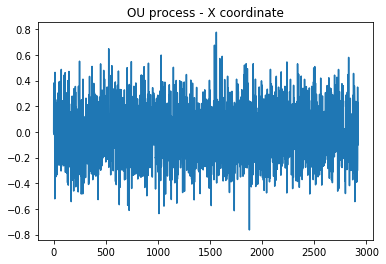

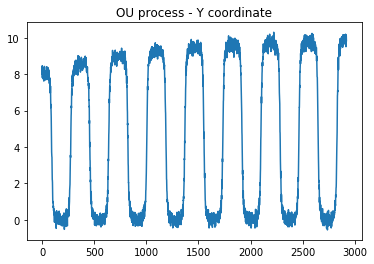

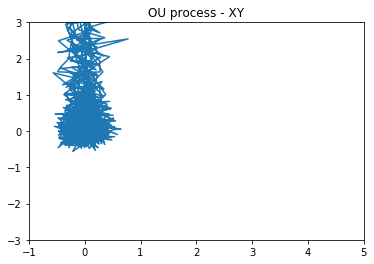

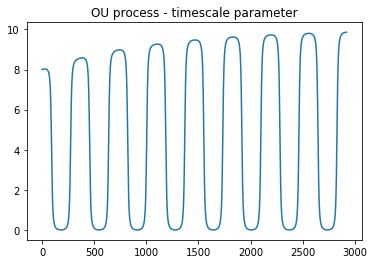

In [2]:
day_steps=1
dt=1.0/day_steps
N=int(8*365*day_steps) # run for 8 years

sigma=np.zeros((N,2))
sigma[:,1]=1
sigma[:,0]=1

revert= 12*np.ones((N,2))
T = np.arange(N)/day_steps

b=5

location = 1 + np.sqrt((1+b**2)/(1+np.cos(2 * np.pi/365. *T)**2*b**2)) *np.cos(2 * np.pi/365. *T)# - signal.square(2 * np.pi/365. *T,duty=0.7))
location = location*(5 - np.exp(-T/(365*3)))

mean_p = np.zeros((N,2))

mean_p[:,1]=location

X_init=mean_p[0]

X=generateOU(N,dt,mean_p,revert,sigma,X_init)

plt.plot(T,X[::1,0])
plt.title('OU process - X coordinate')
plt.show()

plt.plot(T,X[::1,1])
plt.title('OU process - Y coordinate')
plt.show()

plt.plot(X[::1,0],X[::1,1])
plt.xlim(-1,5)
plt.ylim(-3,3)

plt.title('OU process - XY')
plt.show()

plt.plot(T,mean_p[:,1])
plt.title('OU process - timescale parameter')
plt.show()
dataset = pd.DataFrame({'Animal':np.zeros_like(T),
                        'Date':pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')),
                        'Time':pd.to_datetime(pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')), format='%H:%M').time,
                        'Latitude':X[::,0],
                        'Longitude':X[::,1],'Lengthscale':revert[::,1]**-1,'MeanX':mean_p[:,0],'MeanY':mean_p[:,1]})

dataset.to_csv('../data/shift.csv')


In [3]:
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

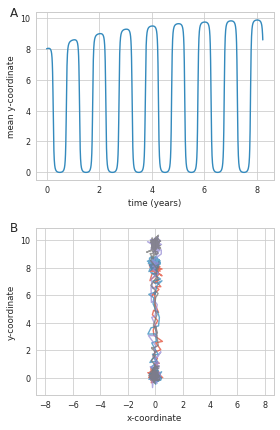

In [25]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%Hh')


gridsize = (2, 1)
fig = plt.figure(figsize=(4, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))



Ty=T/365.


ax1.plot(Ty,mean_p[:,1],color='C1')

ax1.set_xlabel('time (years)')
ax1.set_ylabel('mean y-coordinate')
#ax1.set_xlim(0,7)

ax2.plot(X[:182:1,0],X[:182:1,1],alpha=0.75)

ax2.plot(X[183:365:1,0],X[183:365:1,1],alpha=0.75)

ax2.plot(X[7*365:7*365+182:1,0],X[7*365:7*365+182:1,1],alpha=0.75)

ax2.plot(X[7*365+183:7*365+365:1,0],X[7*365+183:7*365+365:1,1],alpha=0.75)

#ax2.set_ylim(0,0.2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
#ax2.xaxis_date()

#ax2.xaxis.set_major_formatter(myFmt)
#plt.gcf autofmt_xdate()
ax2.set_xlabel('x-coordinate')
ax2.set_ylabel('y-coordinate')
ax2.axis('equal')



plt.tight_layout(h_pad=2,w_pad=3)



xp = ax1.get_position().x0
yp = ax1.get_position().y1    
fig.text(xp - .09, yp- .01, 'A', size=12)

xp = ax2.get_position().x0
yp = ax2.get_position().y1    
fig.text(xp - .09, yp- .01, 'B', size=12)


plt.savefig('../figures/shift_data2.png', dpi=300, bbox_inches = "tight")